### –î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞

1. –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ñ–∞–π–ª wines_data.csv
2. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
3. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É 3-4 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏
4. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å t-test —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è 3-4 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

In [27]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
from numpy import linspace,hstack

import matplotlib
import matplotlib.pyplot as plt


from pylab import plot,show,hist, rcParams 
rcParams['figure.figsize'] = 8, 5


from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats.kde import gaussian_kde

import seaborn as sns
from emoji import emojize

#–≥—Ä–∞—Ñ–∏–∫–∏ –≤ svg –≤—ã–≥–ª—è–¥—è—Ç –ª—É—á—à–µ –±–∞–∑–æ–≤—ã—Ö
%config InlineBackend.figure_format = 'svg' 



#### Data desctiption

1. Alcohol ‚Äì –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è;
2. Malic acid ‚Äì —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —è–±–ª–æ—á–Ω–æ–π –∫–∏—Å–ª–æ—Ç—ã;
3. Alcalinity of ash ‚Äì —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —â–µ–ª–æ—á–∏;
4. Magnesium ‚Äì —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ –º–∞–≥–Ω–∏—è;
5. Total phenols ‚Äì –æ–±—â–µ–µ —á–∏—Å–ª–æ —Ñ–µ–Ω–æ–ª–æ–≤;
6. Flavanoids ‚Äì –§–ª–∞–≤–æ–Ω–æ–∏–¥—ã;
7. Color intensity ‚Äì –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞;
8. Hue ‚Äì –æ—Ç—Ç–µ–Ω–æ–∫ –≤–∏–Ω–∞;
9. OD280/OD315 of diluted wines ‚Äì —Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç—å –≤–∏–Ω–∞;
10. Proline ‚Äì —Å–æ—Ä—Ç –≤–∏–Ω–∞.

### –†–µ—à–µ–Ω–∏–µ

##### 1. –ó–∞–≥—Ä—É–∑–∏—Ç—å —Ñ–∞–π–ª wines_data.csv

In [2]:
#–∑–∞–≥—Ä—É–∂–∞–µ–º —Ñ–∞–π–ª wine_data.csv –≤ wine_data
wine_data = pd.read_csv('wine_data.csv', sep=',')

In [3]:
type(wine_data) #–ø–æ—Å–º–æ—Ç—Ä–∏–º —Ñ–æ—Ä–º–∞—Ç –Ω–∞—à–µ–≥–æ —Ñ–∞–π–ª–∞

pandas.core.frame.DataFrame

In [4]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ –µ—Å—Ç—å –≤ –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–æ–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–≤–µ–¥–µ–Ω–æ –≤—ã—à–µ)
wine_data.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [5]:
#–ø—Ä–æ–≤–µ—Ä–∏–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
wine_data.isnull().sum() 

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º –∫ –∫–∞–∫–æ–º—É –∫–ª–∞—Å—Å—É –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Å–∞–º–æ–µ –∫—Ä–µ–ø–∫–æ–µ –≤–∏–Ω–æ
wine_data.groupby('Class')['Alcohol'].max()

Class
1    14.83
2    13.86
3    14.34
Name: Alcohol, dtype: float64

In [7]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–µ–º–Ω–æ–≥–æ –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
wine_data.describe(include='all')

Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

#### –Ω–µ–º–Ω–æ–≥–æ –≤—ã–≤–æ–¥–æ–≤ —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å –ø—è—Ç–∏ —á–∏—Å–ª–æ–≤–∞—è —Å–≤–æ–¥–∫–∞, –µ—Å–ª–∏ –∫—Ç–æ-—Ç–æ –µ—â–µ –ø–æ–º–Ω–∏—Ç –æ —Ç–∞–∫–æ–π

–∫–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ –ø—Ä–∏–≤–µ–¥–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ –≤—Å–µ–≥–æ 178 –æ–±—å–µ–∫—Ç–æ–≤ (–≤–∏–¥–∏–º–æ –≤–∏–¥–æ–≤ —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –≤–∏–Ω–∞) –≤—Å–µ–≥–æ –≤—ã–¥–µ–ª–∏–Ω–æ 3 –∫–ª–∞—Å–∞ –≤–∏–Ω–∞, –ø–æ –∫—Ä–µ–ø–æ—Å—Ç–∏ –≤–∏–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ –≥—Ä—É–ø–ø–µ –Ω–∞—Ç—É—Ä–∞–ª—å–Ω—ã—Ö (–∫—Ä–µ–ø–æ—Å—Ç—å 9‚Äî16 %) —Ä–∞–∑–º–∞—Ö –≤–∞—Ä–∏–∞—Ü–∏–∏ –ø–æ Alcohol –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π,—Å—Ç–æ–∏—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∞–Ω–æ–º–∞–ª—å–Ω–æ - –≤—ã—Å–æ–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞ Malic acid 5.8, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–∏–≤—ã—à–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å (–æ—Ç 0 - –¥–æ 5), –µ—â–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –¥–ª—è –∏—Å—Å–ª–µ–¥–æ–≤–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫ –æ—Ç—Ç–µ–Ω–æ–∫ –≤–∏–Ω–∞ (Hue) –≤ –≤—ã–±—Ä–∫–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç 25% –±–µ–ª–æ–≥–æ –≤–∏–Ω–∞ –∞ —Ç—Ä–∏ —á–µ—Ç–≤–µ—Ç–∏ –≤—ã–±–æ—Ä–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è—é—Ç –æ—Ç —Ä–æ–∑–æ–≤–æ–≥–æ –¥–æ –∫—Ä–∞—Å–Ω–æ–≥–æ –≤–∏–Ω–∞ 

##### 2. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [8]:
#–≤—ã–ø–æ–ª–Ω–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –Ω–∞—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
corr = wine_data.corr()
corr

Class   Alcohol  Malic acid       Ash  \
Class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
Class                                  0.517859  -0.209179      -0.719163   
Alcohol                               -0.310235   0.270798       0.289101   
Malic acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
Class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
Class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity of ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins

#### –≤—ã–≤–æ–¥—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
–¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –≤—ã—Å–æ–∫—É—é —Å–≤—è–∑—å –∏–º–µ—é—Ç –º–µ–∂–¥—É —Å–æ–±–æ–π:

- –∫—Ä–µ–ø–æ—Å—Ç—å (Alcohol) –∏ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ (Color intensity) 0.546364
- –∫—Ä–µ–ø–æ—Å—Ç—å (Alcohol) –∏ —Å–æ—Ä—Ç –≤–∏–Ω–∞ (Proline) 0.643720

–Ω–∏–∑–∫—É—é —Å–≤—è–∑—å –∏–º–µ—é—Ç:
- —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —è–±–ª–æ—á–Ω–æ–π –∫–∏—Å–ª–æ—Ç—ã (Malic acid) –∏ –æ—Ç—Ç–µ–Ω–æ–∫–∞ –≤–∏–Ω–∞ (Hue) -0.561296
- —Å–æ–¥–µ—Ä–∂–∞–Ω–∏–µ —è–±–ª–æ—á–Ω–æ–π –∫–∏—Å–ª–æ—Ç—ã (Malic acid) –∏ –§–ª–∞–≤–æ–Ω–æ–∏–¥—ã (Flavanoids) -0.411007 


In [28]:
#–≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

sns.heatmap(corr, annot=True, linewidths=.5,cmap="YlGnBu", linecolor='white', annot_kws={"size": 6},\
            xticklabels=corr.columns.values, yticklabels=corr.columns.values)

##### 3. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏ –º–µ–∂–¥—É 3-4 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏

##### 3.1 –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è (Alcohol) –∏ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ (Color intensity), —Ç–∞–∫ —Å–∫–∞–∑–∞—Ç—å –∫–∞–∫ –∫—Ä–µ–ø–æ—Å—Ç—å –≤–ª–∏—è–µ—Ç –Ω–∞ –≥–ª—É–±–∏–Ω—É —Ü–≤–µ—Ç–∞ –≤–∏–Ω–∞

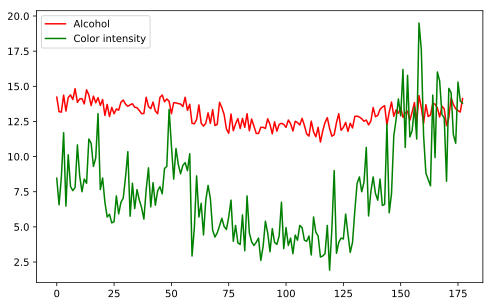

In [29]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ—á–µ–≤–∏–¥–Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏ 
plt.plot(wine_data['Alcohol'], 'r')
plt.plot(wine_data['Color intensity']*1.5, 'g') #–º–∞—Å—à—Ç–∞–±–∏—Ä—É—é —Å –ø–æ–º–æ—â—å—é –¥–æ–º–Ω–æ–∂–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è Alcohol –Ω–∞ 0.5
plt.legend();

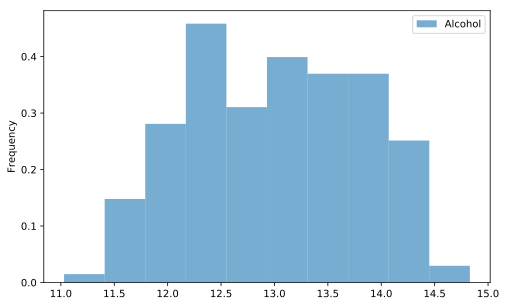

In [30]:
#–¥–ª—è –ª—É—á—à–µ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–æ–π —Ç–∏–ø —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–º–µ–µ—Ç –Ω–∞—à –∞–ª–∫–æ–≥–æ–ª—å 
#–±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤—Ç—å —Ç–∞–∫ –Ω–∞–∑—ã–≤–∞–µ–º—ã–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω—ã–π —Ç–∏–ø –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
wine_data['Alcohol'].plot.hist(normed=1, alpha=0.6)
plt.legend();

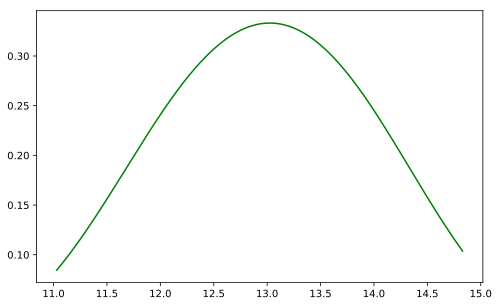

In [31]:
#–≤—ã–ø–æ–ª–Ω–∏–º —è–¥–µ—Ä–Ω—É—é –æ—Ü–µ–Ω–∫—É –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ 
my_dens_alc = gaussian_kde(wine_data['Alcohol'], bw_method= 1)
x = linspace(min(wine_data['Alcohol']), max(wine_data['Alcohol']), 1000)
plot(x, my_dens_alc(x), 'g')

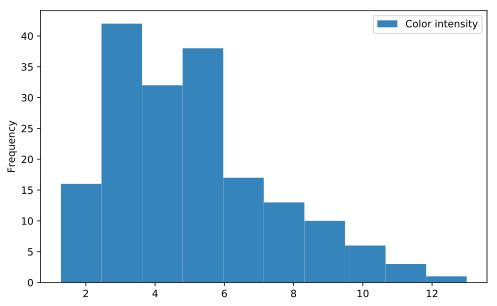

In [32]:
wine_data['Color intensity'].plot.hist(alpha=0.9)
plt.legend();

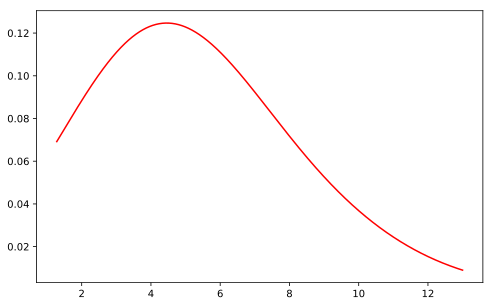

In [33]:
my_dens_col = gaussian_kde(wine_data['Color intensity'], bw_method= 1)
y = linspace(min(wine_data['Color intensity']), max(wine_data['Color intensity']), 1000)
plot(y, my_dens_col(y), 'r')


##### 3.2 –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –∫—Ä–µ–ø–æ—Å—Ç–∏ (Alcohol) –∏ –∫–ª–∞—Å—Å–∞ –≤–∏–Ω–∞ (Class)

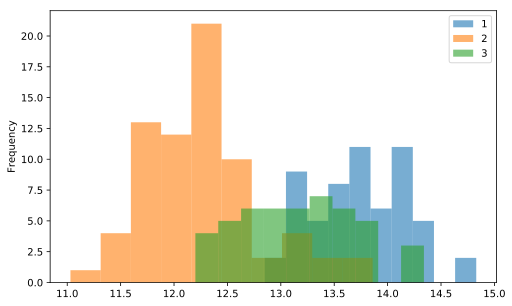

In [34]:
#–ø–æ—Å–º–æ—Ç—Ä–∏–º –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É –∫—Ä–µ–ø–æ—Å—Ç—å—é –≤–∏–Ω–∞ –∏ –∏—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å—é —Ü–≤–µ—Ç–∞ (–≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–ª–∞—Å—Å–∞ –≤–∏–Ω–∞)

wine_data.groupby('Class')['Alcohol'].plot.hist(alpha=0.6)
plt.legend();

Text(0.5,0.98,'')

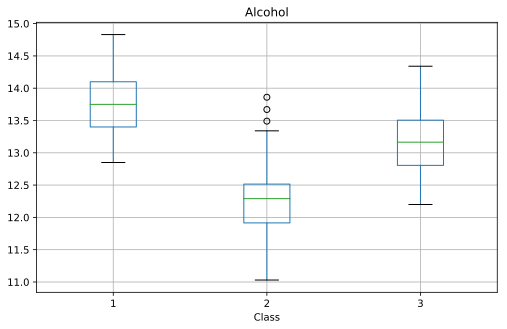

In [35]:
#–≤–æ –≤—Ç–æ—Ä–æ–º –∫–ª–∞—Å—Å–µ –µ—Å—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã–ª–µ—Ç–æ–≤ –≤ –ø—Ä–µ–¥–µ–ª–µ 3(Q3 - Q1) –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω–æ–≥–æ —Ä–∞–∑–º–∞—Ö–∞
#—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤ 1 –∏ 3 –∫–ª–∞—Å—Å–∞—Ö —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ–µ –∞ –≤–æ –≤—Ç–æ—Ä–æ–º —Å–º–µ—â–µ–Ω–Ω–æ –≤ –ª–µ–≤–æ
ax = wine_data.boxplot(column='Alcohol', by='Class')
ax.get_figure().suptitle('')

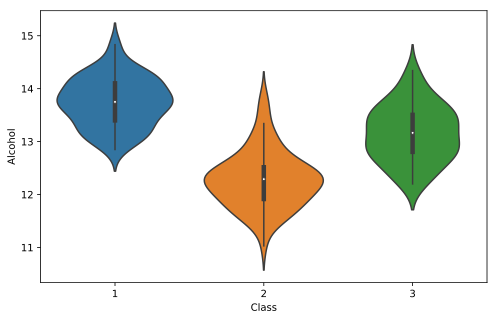

In [36]:

#–≤ 1 –∏ 2 –∫–ª–∞—Å—Å–µ —è—Ä–∫–æ–≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–µ —É–Ω–∏–º–æ–¥–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –≤ 3 –∫–ª–∞—Å—Å–µ –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –±–∏–º–æ–¥–∞–ª—å–Ω–æ—Å—Ç–∏

axes = plt.subplots(1, sharey=True, figsize=(8,5))
sns.violinplot(x='Class', y='Alcohol', data=wine_data, ax=axes[1]);

##### 3.3 –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –∫—Ä–µ–ø–æ—Å—Ç–∏ (Alcohol)  –∏ –§–ª–∞–≤–æ–Ω–æ–∏–¥—ã (Flavanoids)

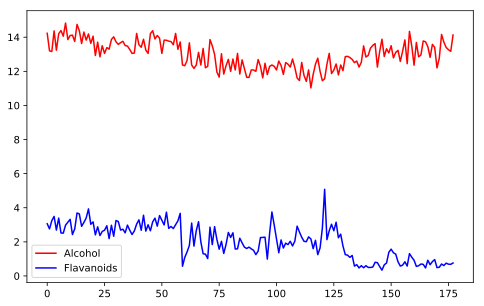

In [37]:
plt.plot(wine_data['Alcohol'], 'r') 
plt.plot(wine_data['Flavanoids'], 'b')
plt.legend();

##### 3.4 –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –∫—Ä–µ–ø–æ—Å—Ç–∏  –≤–∏–Ω–∞ (Alcohol) –∏ –≥–µ—Ç–µ—Ä–æ—Ü–∏–∫–ª–∏—á–µ—Å–∫–æ–π –∞–º–∏–Ω–æ–∫–∏—Å–ª–æ—Ç—ã

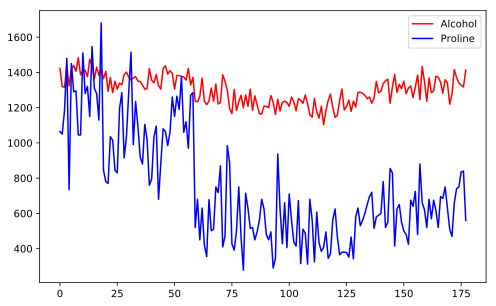

In [38]:
plt.plot(wine_data['Alcohol']*100, 'r') #–º–∞—Å—à—Ç–∞–±–∏—Ä—É—é —Å –ø–æ–º–æ—â—å—é –¥–æ–º–Ω–æ–∂–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è Alcohol –Ω–∞ 100
plt.plot(wine_data['Proline'], 'b')
plt.legend();

##### 3.5 –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ (Color intensity), –æ—Ç—Ç–µ–Ω–æ–∫ –≤–∏–Ω–∞ (Hue) –∏ —Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç—å –≤–∏–Ω–∞ (OD280/OD315 of diluted wines)

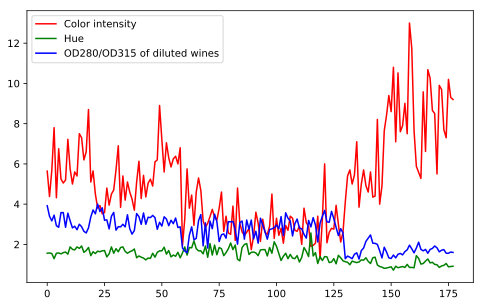

In [39]:
plt.plot(wine_data['Color intensity'], 'r')
plt.plot(wine_data['Hue']*1.5, 'g') #–º–∞—Å—à—Ç–∞–±–∏—Ä—É—é —Å –ø–æ–º–æ—â—å—é –¥–æ–º–Ω–æ–∂–µ–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏—è Hue –Ω–∞ 100
plt.plot(wine_data['OD280/OD315 of diluted wines'], 'b')
plt.legend();

######  –∫–∞–∂–µ—Ç—Å—è –º—ã –Ω–∞—à–ª–∏ —á–µ–º–ø–∏–æ–Ω–∞, –æ—Ç–ª–∏—á–Ω–æ –ø—Ä–æ—Å–ª–µ–∂–∏–≤–∞–µ—Ç—Å—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –º–µ–∂–¥—É Hue –∏ OD280/OD315 of diluted wines

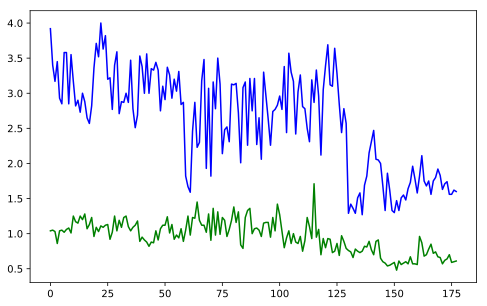

In [40]:
plt.plot(wine_data['Hue'], 'g') 
plt.plot(wine_data['OD280/OD315 of diluted wines'], 'b')


##### 4. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å t-test —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –¥–ª—è 3-4 –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

4.1 –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–∏–∑—É —á—Ç–æ —Å—Ä –∑–Ω–∞—á –æ—Ç—Ç–µ–Ω–æ–∫ –≤–∏–Ω–∞ (Hue) –∏ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ (Color intensity) —Ä–∞–≤–Ω—ã

- H0 = —Å—Ä –∑–Ω–∞—á Hue –∏ Color intensity –æ–¥–∏–Ω–∞–∫–æ–≤—ã –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é
- H1 = —Å—Ä –∑–Ω–∞—á Hue –∏ Color intensity —Ä–∞–∑–ª–∏—á–Ω—ã –ø–æ –∑–Ω–∞—á–µ–Ω–∏—é

–ó–Ω–∞—á–µ–Ω–∏–µ pvalue=3.4178572035256162e-74 —Å—Ç—Ä–µ–º–∏—Ç—Å—è –∫ 0, –∑–Ω–∞—á–∏—Ç —É –Ω–∞—Å –µ—Å—Ç—å –≤—Å–µ –æ—Å–Ω–æ–≤–∞–Ω–∏—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É



In [22]:
stats.ttest_ind(wine_data['Hue'], wine_data['Color intensity'])

Ttest_indResult(statistic=-23.485186398851056, pvalue=3.4178572035256162e-74)

4.2.1 –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–∏–∑—É —á—Ç–æ —Å—Ä –∑–Ω–∞—á –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–≥–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è (Alcohol) —Å —á–∏—Å–ª–æ–º (–±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ 13.00 –∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ 11.03) —Ä–∞–≤–Ω—ã

- H0 = —Å—Ä –∑–Ω–∞—á Alcohol –≤ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 13  
- H1 = —Å—Ä –∑–Ω–∞—á Alcohol –≤ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ —Ä–∞–≤–Ω–æ 13

–ó–Ω–∞—á–µ–Ω–∏–µ pvalue=0.9919083221024861 –æ—á–µ–Ω—å –±–ª–∏–∑–∫–æ –∫ 1 –∑–Ω–∞—á–∏—Ç —É –Ω–∞—Å –Ω–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ—Å–Ω–æ–≤–∞–Ω–∏–π —á—Ç–æ–±—ã –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [23]:
stats.ttest_1samp(wine_data['Alcohol'], 13.00)

Ttest_1sampResult(statistic=0.01015592394800969, pvalue=0.9919083221024861)

4.2.2 –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–∏–∑—É —á—Ç–æ —Å—Ä –∑–Ω–∞—á –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–≥–æ —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—è –∞–ª–∫–æ–≥–æ–ª—è (Alcohol) —Å —á–∏—Å–ª–æ–º (–±–µ—Ä–µ–º —Å—Ä–µ–¥–Ω–µ–µ 13.00 –∏ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ 11.03) —Ä–∞–≤–Ω—ã

- H0 = —Å—Ä –∑–Ω–∞—á Alcohol –≤ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ —Ä–∞–≤–Ω–æ 11.03 
- H1 = —Å—Ä –∑–Ω–∞—á Alcohol –≤ –Ω–∞—à–µ–π –≤—ã–±–æ—Ä–∫–µ –Ω–µ —Ä–∞–≤–Ω–æ 11.03 

–ó–Ω–∞—á–µ–Ω–∏–µ pvalue=2.6968678945352247e-76 –æ—á–µ–Ω—å –Ω–∏–∑–∫–æ–µ, –∑–Ω–∞—á–∏—Ç —É –Ω–∞—Å –µ—Å—Ç—å –≤—Å–µ –æ—Å–Ω–æ–≤–∞–Ω–∏—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [24]:
stats.ttest_1samp(wine_data['Alcohol'], 11.03)

Ttest_1sampResult(statistic=32.38539493854062, pvalue=2.6968678945352247e-76)

4.3 –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–∏–∑—É —á—Ç–æ —Å—Ä –∑–Ω–∞—á —Ä–∞–∑–±–∞–≤–ª–µ–Ω–Ω–æ—Å—Çb –≤–∏–Ω–∞ (OD280/OD315 of diluted wines) –∏ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–æ—Å—Ç—å —Ü–≤–µ—Ç–∞ –≤–∏–Ω–∞ (Color intensity) —Ä–∞–≤–Ω—ã

- H0 = —Å—Ä –∑–Ω–∞—á OD280/OD315 of diluted wines –∏ Color intensity —Ä–∞–≤–Ω—ã 
- H1 = —Å—Ä –∑–Ω–∞—á OD280/OD315 of diluted wines –∏ Color intensity –Ω–µ —Ä–∞–≤–Ω—ã 

–ó–Ω–∞—á–µ–Ω–∏–µ pvalue=1.2112200845382484e-33 –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–æ–µ, –∑–Ω–∞—á–∏—Ç —É –Ω–∞—Å –µ—Å—Ç—å –≤—Å–µ –æ—Å–Ω–æ–≤–∞–Ω–∏—è –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

In [25]:
stats.ttest_ind(wine_data['OD280/OD315 of diluted wines'], wine_data['Color intensity'])

Ttest_indResult(statistic=-13.461817006745923, pvalue=1.2112200845382484e-33)

In [41]:
emojize(':thumbs_up:')

'üëç'